# 1- Contexte

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   #Importer les librairies
import seaborn as sns
import scipy.stats as st
%matplotlib inline

In [2]:
Nutrition_data = pd.read_csv("openfoodfacts.csv", delimiter="\t") #Importer et afficher les données
Nutrition_data.head()

FileNotFoundError: File b'openfoodfacts.csv' does not exist

In [3]:
Nutrition_data.shape #Dimension du Dataset

(320772, 162)

In [5]:
#Nutrition_data.dtypes #Type des données

Text(0,0.5,'% Filling ')

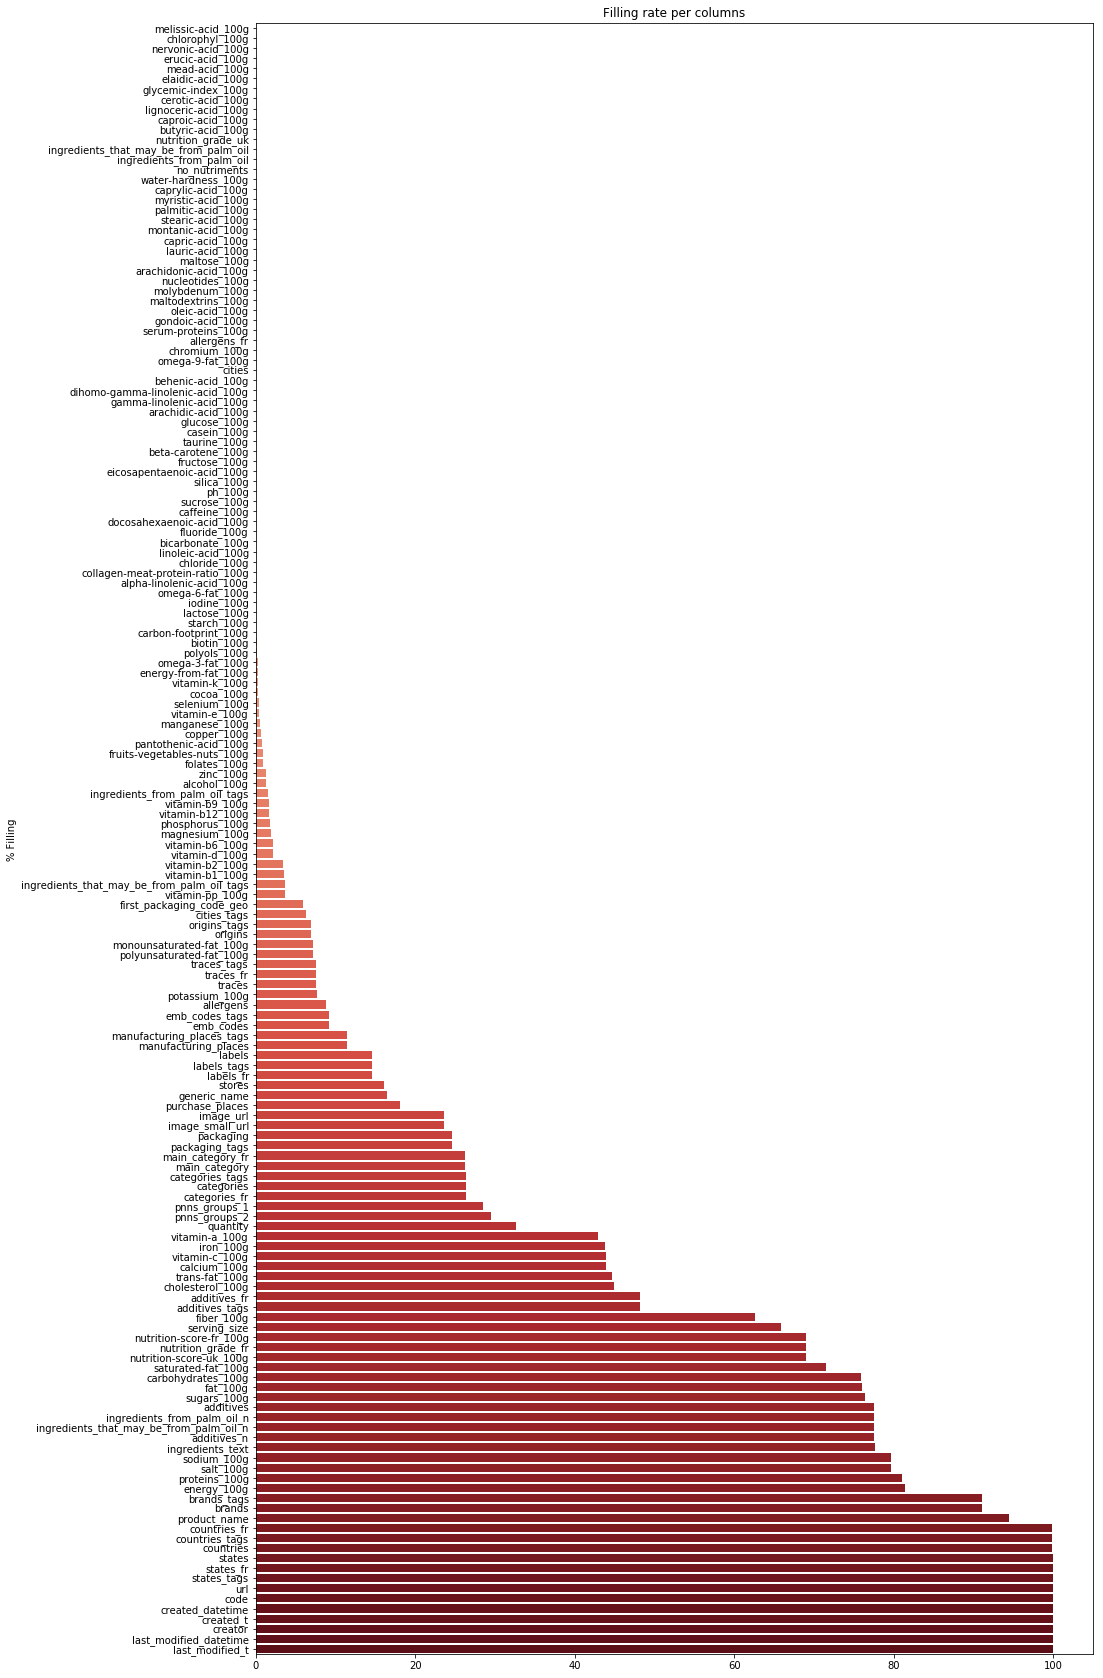

In [4]:
#Taux de remplissage par variables

Taux_remplissage_0 = Nutrition_data.notna().sum().sort_values(ascending=True) / Nutrition_data.shape[0] * 100 
graphe_Remplissage_0 = Taux_remplissage_0[(Taux_remplissage_0 >= 0) & (Taux_remplissage_0 <= 100)]
plt.figure(figsize=(15,30))
Filling_percent = sns.barplot(y=graphe_Remplissage_0.index.values, x=graphe_Remplissage_0.values, palette="Reds")
plt.title("Filling rate per columns")
plt.ylabel("% Filling ")

In [7]:
#(Nutrition_data.isnull().sum().sum())/(Nutrition_data.shape[0]*Nutrition_data.shape[1])*100


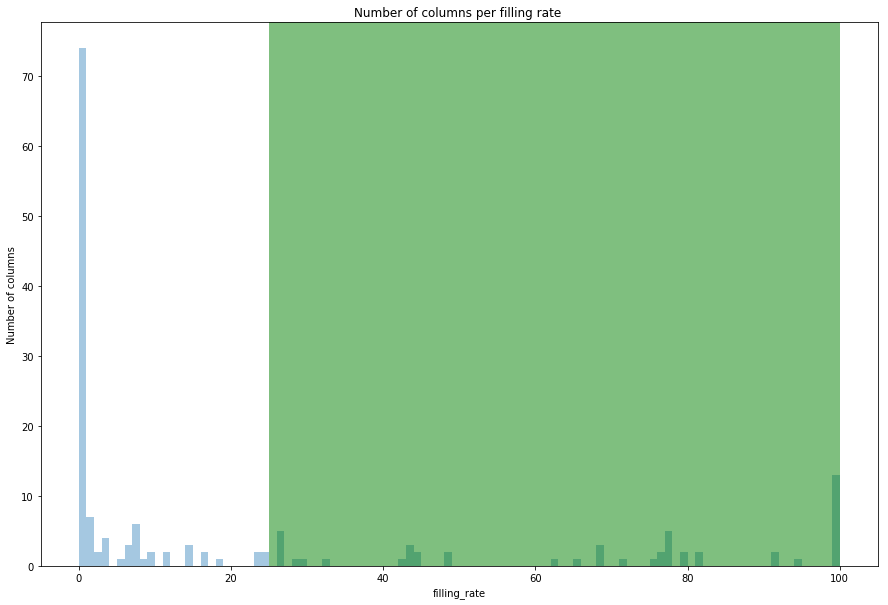

In [5]:
#Filtrage de nombre de colonnes dépassant un taux de remplissage de 25%

plt.figure(figsize=(15,10))
sns.distplot(Taux_remplissage_0, bins=100, kde=False)
plt.xlabel("filling_rate")
plt.ylabel("Number of columns")
plt.title("Number of columns per filling rate ")
plt.axvspan(25, 100, facecolor='g', alpha=0.5)

In [9]:
usable_columns = Taux_remplissage_0[Taux_remplissage_0 > 25].index
len(usable_columns)

50

# 2- Nettoyage du Dataset

In [6]:
#Filtrage des colonnes unitilisables avec un taux de remplissage < 25%
unusable_columns = Taux_remplissage_0[Taux_remplissage_0 < 25].index
# Suppression des colonnes contenant plus que 75% de NaNs
Nutrition_data.drop(unusable_columns, axis=1, inplace=True)
Nutrition_data.shape

(320772, 50)

In [7]:
stat = Nutrition_data.describe()
stat

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,248939.000000,248939.000000,248939.000000,2.611130e+05,243891.000000,229554.000000,143298.000000,144090.000000,243588.000000,244971.000000,200886.000000,259922.000000,255510.000000,255463.000000,137554.000000,140867.000000,141050.000000,140462.000000,221210.000000,221210.000000
mean,1.936024,0.019659,0.055246,1.141915e+03,12.730379,5.129932,0.073476,0.020071,32.073981,16.003484,2.862111,7.075940,2.028624,0.798815,0.000397,0.023367,0.125163,0.003652,9.165535,9.058049
std,2.502019,0.140524,0.269207,6.447154e+03,17.578747,8.014238,1.540223,0.358062,29.731719,22.327284,12.867578,8.409054,128.269454,50.504428,0.073278,2.236451,3.318263,0.214408,9.055903,9.183589
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-3.570000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,3.770000e+02,0.000000,0.000000,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1.100000e+03,5.000000,1.790000,0.000000,0.000000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,0.000000,0.000000,0.035000,0.001010,10.000000,9.000000
75%,3.000000,0.000000,0.000000,1.674000e+03,20.000000,7.140000,0.000000,0.020000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,0.000107,0.003700,0.106000,0.002400,16.000000,16.000000
max,31.000000,2.000000,6.000000,3.251373e+06,714.290000,550.000000,369.000000,95.238000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000,40.000000,40.000000


In [8]:
# Sélection des variables intéressantes pour la construction du générateur de recettes saines et équilibrées

col_names = Nutrition_data.columns.tolist()
columns_100g = []
columns_100g.append("product_name")
for c in col_names:
    if c.endswith("100g"): 
        columns_100g.append(c)
columns_100g.remove("nutrition-score-uk_100g")
columns_100g.remove("nutrition-score-fr_100g")
columns_100g.remove("trans-fat_100g") # Beaucoup de 0
columns_100g.append("nutrition_grade_fr")
df_100g = Nutrition_data[columns_100g]
df_100g.head()

,product_name,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition_grade_fr
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),2243.0,28.57,28.57,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,d
2,Peanuts,1941.0,17.86,0.00,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,b
3,Organic Salted Nut Mix,2540.0,57.14,5.36,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,d
4,Organic Polenta,1552.0,1.43,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_100g.shape

(320772, 16)

Text(0,0.5,'% Filling ')

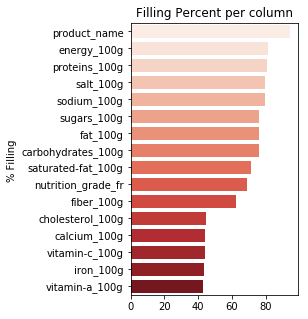

In [10]:
#Taux de remplissage par colonnes du df_100g avec 16 variables
Taux_remplissage_1 = df_100g.notna().sum().sort_values(ascending=False) / df_100g.shape[0] * 100 
Taux_remplissage_1  = Taux_remplissage_1[(Taux_remplissage_1 >= 0) & (Taux_remplissage_1 <= 100)]

plt.figure(figsize=(3,5))
Filling_percent = sns.barplot(y=Taux_remplissage_1.index.values, x=Taux_remplissage_1.values, palette="Reds")
plt.title("Filling Percent per column")
plt.ylabel("% Filling ")

Text(0,0.5,'% Filling ')

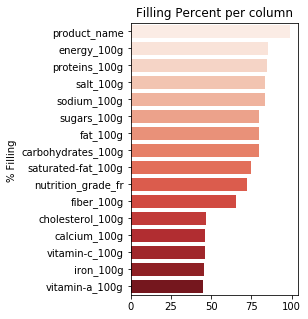

In [11]:
# Supprimer les lignes contenant que des NaNs
delete_rows_nans = df_100g.dropna(how='all')

#Taux de remplissage
Taux_remplissage_2 = delete_rows_nans.notna().sum().sort_values(ascending=False) / delete_rows_nans.shape[0] * 100 
Taux_remplissage_2

graphe_Remplissage_2 = Taux_remplissage_2[(Taux_remplissage_2 >= 0) & (Taux_remplissage_2 <= 100)]

plt.figure(figsize=(3,5))
Filling_percent = sns.barplot(y=graphe_Remplissage_2.index.values, x=graphe_Remplissage_2.values, palette="Reds")
plt.title("Filling Percent per column")
plt.ylabel("% Filling ")

In [12]:
delete_rows_nans.shape

(306393, 16)

Text(0,0.5,'% Filling ')

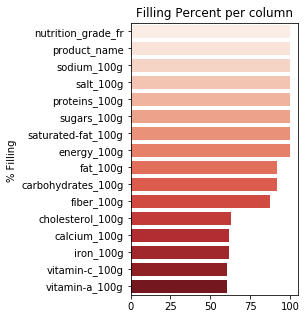

In [13]:
# Supprimer les lignes dont le nom des produits et le grade nutritionel sont des NaNs
New_Nutrition_dataset = delete_rows_nans.dropna(subset = ["product_name", "nutrition_grade_fr"])
New_Nutrition_dataset.head()

#Pourcentage des non NaNs par colonnes
Taux_remplissage_3 = New_Nutrition_dataset.notna().sum().sort_values(ascending=False) / New_Nutrition_dataset.shape[0] * 100 
graphe_Remplissage_3 = Taux_remplissage_3[(Taux_remplissage_3 >= 0) & (Taux_remplissage_3 <= 100)]
plt.figure(figsize=(3,5))
Filling_percent = sns.barplot(x=graphe_Remplissage_3.values, y=graphe_Remplissage_3.index.values, palette="Reds")
plt.title("Filling Percent per column")
plt.ylabel("% Filling ")


In [14]:
New_Nutrition_dataset.shape

(218463, 16)

In [15]:
New_Nutrition_dataset=New_Nutrition_dataset.iloc[0:218456, 0:16]
New_Nutrition_dataset.head()

,product_name,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition_grade_fr
1,Banana Chips Sweetened (Whole),2243.0,28.57,28.57,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,d
2,Peanuts,1941.0,17.86,0.00,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,b
3,Organic Salted Nut Mix,2540.0,57.14,5.36,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,d
7,Organic Muesli,1833.0,18.75,4.69,NaN,57.81,15.62,9.4,14.06,0.13970,0.055,NaN,NaN,0.062,0.00422,c
12,Zen Party Mix,2230.0,36.67,5.00,NaN,36.67,3.33,6.7,16.67,1.60782,0.633,NaN,NaN,0.133,0.00360,d


# 3-Remplacement des données manquantes et abérrantes 

In [16]:
#Transformer les données de la  variable "nutrition_grade_fr" en données numériques pour faciliter l'analyse et le traitement 
df_0 = New_Nutrition_dataset.iloc[:,15]
df_1 = New_Nutrition_dataset.iloc[:,0:15]
df_1.reset_index(drop = True, inplace = True) # Réinitialisation des index lignes
from sklearn.preprocessing import LabelEncoder  #Transformer "nutrition_grade_fr" en valeurs numériques allant de 0 à 4 
labelencoder_df_0 = LabelEncoder()
df_0 = labelencoder_df_0.fit_transform(df_0)
nutrition_grade_fr_Num = pd.DataFrame(df_0)
myList = list(nutrition_grade_fr_Num.columns) #Reconstruction et renomination de la variable "nutrition_grade_fr" avec indexage réinitialisé    
myList[0] = 'nutrition_grade_fr_Num'
nutrition_grade_fr_Num.columns = myList
nutrition_grade_fr_Num
New_Nutrition_dataset_Num = df_1.join(nutrition_grade_fr_Num) #Construction d'un DataFrame avec une Jointure (Indéxage réinitialisé, regroupement des 16 variables, "nutrition_grade_fr" numérique) 
New_Nutrition_dataset_Num.head()


,product_name,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition_grade_fr_Num
0,Banana Chips Sweetened (Whole),2243.0,28.57,28.57,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,3
1,Peanuts,1941.0,17.86,0.00,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,1
2,Organic Salted Nut Mix,2540.0,57.14,5.36,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,3
3,Organic Muesli,1833.0,18.75,4.69,NaN,57.81,15.62,9.4,14.06,0.13970,0.055,NaN,NaN,0.062,0.00422,2
4,Zen Party Mix,2230.0,36.67,5.00,NaN,36.67,3.33,6.7,16.67,1.60782,0.633,NaN,NaN,0.133,0.00360,3


In [17]:
New_Nutrition_dataset_Num.shape

(218456, 16)

In [20]:
stat_0 = New_Nutrition_dataset_Num.describe()
stat_0

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition_grade_fr_Num
count,2.182700e+05,201010.000000,218270.000000,137077.000000,200982.000000,218270.000000,191715.000000,218270.000000,218270.000000,218270.000000,131962.000000,132798.000000,135194.000000,134499.000000,218456.000000
mean,1.195373e+03,13.337201,4.954507,0.019242,33.249956,15.004324,2.829103,7.778696,1.646219,0.648118,0.000144,0.008269,0.112091,0.003103,2.193975
std,7.031389e+03,16.192746,7.650321,0.366696,28.341681,21.191652,13.078449,8.131484,138.277716,54.440046,0.002323,0.437461,2.753822,0.172315,1.350270
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-17.860000,0.000000,-3.570000,0.000000,0.000000,0.000000,-0.002100,0.000000,-0.000260,0.000000
25%,4.520000e+02,0.833000,0.000000,0.000000,7.000000,1.280000,0.000000,1.900000,0.100000,0.039370,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.193000e+03,7.140000,1.790000,0.000000,24.000000,5.000000,1.500000,5.700000,0.650000,0.255906,0.000000,0.000000,0.036000,0.001010,2.000000
75%,1.715000e+03,21.430000,7.140000,0.020000,59.090000,23.000000,3.600000,10.710000,1.361440,0.536000,0.000101,0.002800,0.107000,0.002400,3.000000
max,3.251373e+06,714.290000,550.000000,95.238000,209.380000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,0.800000,152.941200,694.737000,50.000000,4.000000


In [18]:
# D'aprés cette analyse descriptive, je constate l'existence des données aberrantes: 
# Des apports nutritionnels négatifs
# Apports énergitiques de l'odre de e+06!
# la moyenne des grades nutritionnels des produits est C (valeur numérique = 2,19 arrondie à 2) 


In [21]:
#Remplacer les valeurs négatives par des NaNs
New_Nutrition_dataset_1 = New_Nutrition_dataset_Num.iloc[:, 1:16 ]
New_Nutrition_dataset_1[New_Nutrition_dataset_1<0]=np.nan

#Définir la limite supérieure des données
limit_sup = stat_0.loc["75%"]+(1.5*(stat_0.loc["75%"]-stat_0.loc["25%"]))
limit_sup = pd.DataFrame(limit_sup)
outlier_sup = limit_sup.T
outlier_sup

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition_grade_fr_Num
0,3609.5,52.3255,17.85,0.05,137.225,55.58,9.0,23.925,3.2536,1.280945,0.000254,0.007,0.2675,0.006,6.0


In [22]:
#Préparation pour KNN
#Remplacer les valeurs dépassant les limites supérieures par des NaNs
New_Nutrition_dataset_1[New_Nutrition_dataset_1>=outlier_sup.iloc[0, 0:15]]=np.nan
stat_1 = New_Nutrition_dataset_1.describe()
stat_1

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition_grade_fr_Num
count,217553.000000,195652.000000,202378.000000,117336.000000,200979.000000,205573.000000,178224.000000,206886.000000,206551.000000,206551.000000,116196.000000,110627.000000,124314.000000,127785.000000,218456.000000
mean,1168.497912,11.770339,3.423586,0.005703,33.247774,11.611574,1.903245,6.547835,0.756656,0.297896,0.000036,0.000579,0.050122,0.001271,2.193975
std,749.347996,12.955312,4.486568,0.011510,28.336031,14.562719,2.203395,5.956317,0.755059,0.297267,0.000062,0.001384,0.060356,0.001370,1.350270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,448.000000,0.770000,0.000000,0.000000,7.000000,1.050000,0.000000,1.610000,0.096520,0.038000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1184.000000,6.670000,1.300000,0.000000,24.000000,4.400000,1.200000,5.200000,0.581660,0.229000,0.000000,0.000000,0.028000,0.000900,2.000000
75%,1703.000000,20.000000,5.400000,0.004000,59.090000,17.860000,3.300000,9.800000,1.204480,0.474205,0.000060,0.000000,0.081000,0.002160,3.000000
max,3607.000000,52.300000,17.840000,0.049300,136.000000,55.560000,8.930000,23.910000,3.251200,1.280000,0.000253,0.006900,0.267000,0.005970,4.000000


In [23]:
New_Nutrition_dataset_1.head()

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition_grade_fr_Num
0,2243.0,28.57,NaN,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,NaN,0.000,0.00129,3
1,1941.0,17.86,0.00,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0,0.071,0.00129,1
2,2540.0,NaN,5.36,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,3
3,1833.0,18.75,4.69,NaN,57.81,15.62,NaN,14.06,0.13970,0.055,NaN,NaN,0.062,0.00422,2
4,2230.0,36.67,5.00,NaN,36.67,3.33,6.7,16.67,1.60782,0.633,NaN,NaN,0.133,0.00360,3


In [25]:
New_Nutrition_dataset_1.shape

(218456, 15)

In [26]:
# Préparation pour KNN
# Extraction d'un sous-ensemble sans NaNs 
Without_Nans = New_Nutrition_dataset_1.dropna(subset = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g'])
Without_Nans.head()


,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition_grade_fr_Num
1,1941.0,17.86,0.00,0.000,60.71,17.86,7.1,17.86,0.6350,0.250,0.000000,0.0,0.071,0.00129,1
28,1824.0,10.91,0.91,0.000,74.55,25.45,5.5,9.09,0.2540,0.100,0.000000,0.0,0.036,0.00262,2
47,1674.0,14.55,2.73,0.000,60.00,21.82,7.3,9.09,0.1143,0.045,0.000000,0.0,0.073,0.00262,1
49,1883.0,22.50,12.50,0.012,70.00,42.50,2.5,5.00,1.0160,0.400,0.000075,0.0,0.050,0.00180,4
50,1941.0,17.86,0.00,0.000,60.71,17.86,7.1,17.86,0.6350,0.250,0.000000,0.0,0.071,0.00129,1


In [27]:
Without_Nans.shape

(61089, 15)

In [28]:
# vérifier l'absence des NaNs dans des lignes 100g

list_new = []
for r in Without_Nans.columns:
    if "100g" in r:
        list_new.append(r)
subset = Without_Nans[list_new]
print('empty 100g raws: {}'.format(subset.isnull().all(axis=1).sum()))

empty 100g raws: 0


In [29]:
# Data Frame de référence 54614 lignes pour la réalisation du KNN 

Sous_ensemble_KNN = Without_Nans.iloc[0:54614, 0:15]
Sous_ensemble_KNN.head()


,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition_grade_fr_Num
1,1941.0,17.86,0.00,0.000,60.71,17.86,7.1,17.86,0.6350,0.250,0.000000,0.0,0.071,0.00129,1
28,1824.0,10.91,0.91,0.000,74.55,25.45,5.5,9.09,0.2540,0.100,0.000000,0.0,0.036,0.00262,2
47,1674.0,14.55,2.73,0.000,60.00,21.82,7.3,9.09,0.1143,0.045,0.000000,0.0,0.073,0.00262,1
49,1883.0,22.50,12.50,0.012,70.00,42.50,2.5,5.00,1.0160,0.400,0.000075,0.0,0.050,0.00180,4
50,1941.0,17.86,0.00,0.000,60.71,17.86,7.1,17.86,0.6350,0.250,0.000000,0.0,0.071,0.00129,1


In [30]:
Sous_ensemble_KNN.shape

(54614, 15)

In [31]:
#Classification données indépendantes et donées dépendantes

X = Sous_ensemble_KNN.iloc[:, 0:14]
Y = Sous_ensemble_KNN.iloc[:,-1].values
stat_2=X.describe()
stat_2


,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
count,54614.000000,54614.000000,54614.000000,54614.000000,54614.000000,54614.000000,54614.000000,54614.000000,54614.000000,54614.000000,54614.000000,54614.000000,54614.000000,54614.000000
mean,1078.130500,9.874472,3.096418,0.007834,36.867106,14.008343,2.066119,5.986851,0.800757,0.315258,0.000030,0.000656,0.049515,0.001244
std,696.582174,11.345456,4.103716,0.013022,26.310588,15.490587,2.229571,4.888371,0.733186,0.288656,0.000053,0.001435,0.057924,0.001293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,393.000000,0.890000,0.000000,0.000000,12.300000,2.000000,0.000000,2.500000,0.142240,0.056000,0.000000,0.000000,0.000000,0.000000
50%,1046.000000,5.070000,1.200000,0.000000,31.715000,6.670000,1.500000,4.920000,0.683260,0.269000,0.000000,0.000000,0.030000,0.000900
75%,1674.000000,16.070000,5.260000,0.012000,61.190000,23.375000,3.500000,8.770000,1.191260,0.469000,0.000051,0.000000,0.088000,0.002150
max,3184.000000,52.000000,17.810000,0.049300,100.000000,55.560000,8.900000,23.910000,3.246120,1.278000,0.000253,0.006900,0.267000,0.005870


In [32]:
# Séparer training / testing set
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30) #Répartition  70/30 entre training et testing set.

In [33]:
# Feature scaling
#from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Créer un premier Régresseur 5-NN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(5)
knn.fit(X_train,Y_train)
A= knn.predict(X_train) #Estimation du Y_train
np.around(A) #arrondir les valeurs de Y_train
B=A.astype(int) #Transformer les valeurs de Y_train en entiers
B

array([4, 1, 1, ..., 2, 2, 2])

In [34]:
1-knn.score(X_test, Y_test) #Taux d'erreur 

0.05770660175892173

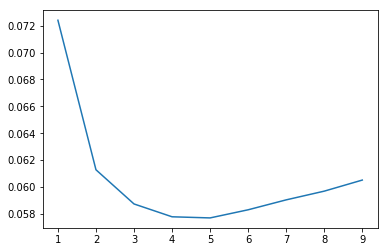

In [35]:
# K optimal (tester le modèle pour les k de 1 à 10)
krange = range(1,10)
errors = []
for k in krange:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, Y_train) 
    errors.append(1-knn.score(X_test, Y_test)) #Mesurer l'erreur test
plt.plot(krange, errors) #Afficher la performance en fonction de k
plt.show()

In [36]:
#Standardisation du sous-ensemble de référence X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#les parties du dataset à corriger (54614*4 = 218456)

#Y1_NaN = New_Nutrition_dataset_1.iloc[0:54614, 0:14]
#Y1_NaN = New_Nutrition_dataset_1.iloc[54614:109228, 0:14]
#Y1_NaN = New_Nutrition_dataset_1.iloc[109228:163842, 0:14]
Y1_NaN = New_Nutrition_dataset_1.iloc[163842:218456, 0:14]

#Remplacer les NaNs par des zéros
Y2_NaN_0 = Y1_NaN.fillna(0)

#Estimation des NaNs
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(4)
knn.fit(X,Y2_NaN_0)
Y_Estime = knn.predict(X)
Y_Estime = pd.DataFrame(Y_Estime)
#Y_Estime.head()

#Transformation du sous-ensemble avec NaNs en sous-ensemble booleen
A_bool = Y1_NaN.isnull()
#A.head()

#Réccupération d'un sous-ensemble contenant que des zéros et les valeurs éstimées des NaNs
B_remplace_NaN = (Y_Estime.values) * (A_bool.values)

# Réccupération du DataFrame avec les données initiales et les valeurs de NaNs estimées
C_Liste_sans_NaN = B_remplace_NaN + Y2_NaN_0.values
D_New_dataset_sans_NaN = pd.DataFrame(C_Liste_sans_NaN) #transformation en df
Nutrition_grade_str = New_Nutrition_dataset.iloc[163842:218456,15] #Récupération du "nutrition_Grade" 
Nutrition_grade_str.reset_index(drop = True, inplace = True) # Réinitialisation des indexes du "nutrition_Grade" 
New_Nutrition_dataset_clean_3 = D_New_dataset_sans_NaN.join(Nutrition_grade_str) # Réintégration du "nutrition_Grade" 
New_Nutrition_dataset_clean_3.columns = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g', 'nutrition_grade_fr']
New_Nutrition_dataset_clean_3.head(10)


,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition_grade_fr
0,591.0,3.7,2.9,0.0,23.4,0.2,2.100,2.3,0.0762,0.030000,0.000000,0.000000,0.00000,0.000000,b
1,656.0,4.0,0.5,0.0,26.6,1.3,1.200,2.7,0.2500,0.098425,0.000000,0.001325,0.00550,0.000100,b
2,509.0,3.0,0.4,0.0,20.0,0.0,2.600,2.2,0.0600,0.023622,0.000000,0.000000,0.00000,0.000000,a
3,554.0,4.0,2.2,0.0,21.0,0.2,1.600,2.1,0.1016,0.040000,0.000000,0.000000,0.00000,0.000000,b
4,925.0,13.7,4.7,0.0,20.8,1.8,2.900,2.4,0.7000,0.275591,0.000000,0.000000,0.00000,0.000000,a
5,1159.0,17.0,2.0,0.0,26.0,4.0,2.675,4.0,1.2000,0.472441,0.000000,0.000000,0.00000,0.000000,c
6,760.0,9.1,1.1,0.0,21.0,0.5,3.200,2.4,0.6900,0.271654,0.000000,0.000000,0.00000,0.000000,b
7,744.0,9.2,2.8,0.0,20.0,0.5,2.800,2.4,0.5000,0.196850,0.000000,0.000000,0.00000,0.000000,a
8,614.0,4.9,0.7,0.0,22.0,0.5,2.400,2.3,0.8800,0.346457,0.000000,0.000000,0.00000,0.000085,b
9,440.0,5.0,3.5,0.0,12.5,0.2,0.000,2.0,0.7500,0.295276,0.000025,0.000000,0.03325,0.000000,c


In [37]:
New_Nutrition_dataset_clean_3.shape

(54614, 15)

In [38]:
#Dataset final
Final_Nutrition_data=pd.read_csv("Final_Nutrition_data.csv")
Final_Nutrition_data=Final_Nutrition_data.drop(["Unnamed: 0"], axis=1) 
Final_Nutrition_data.head()

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition_grade_fr
0,2243.0,28.570,1.25,0.0180,64.29,14.29,3.60,3.57,0.00000,0.000,0.000000,0.0,0.000,0.00129,d
1,1941.0,17.860,0.00,0.0000,60.71,17.86,7.10,17.86,0.63500,0.250,0.000000,0.0,0.071,0.00129,b
2,2540.0,8.035,5.36,0.0000,17.86,3.57,7.10,17.86,1.22428,0.482,0.000024,0.0,0.143,0.00514,d
3,1833.0,18.750,4.69,0.0000,57.81,15.62,1.75,14.06,0.13970,0.055,0.000000,0.0,0.062,0.00422,c
4,2230.0,36.670,5.00,0.0045,36.67,3.33,6.70,16.67,1.60782,0.633,0.000000,0.0,0.133,0.00360,d


In [39]:
Final_Nutrition_data.shape


(218456, 15)

Text(0,0.5,'% Filling ')

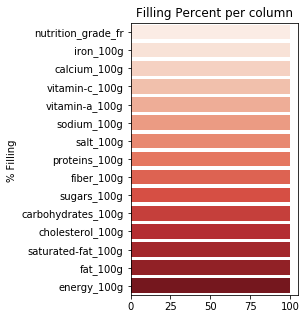

In [40]:
Taux_remplissage_Final = Final_Nutrition_data.notna().sum().sort_values(ascending=False) / Final_Nutrition_data.shape[0] * 100 
Taux_remplissage_Final  = Taux_remplissage_Final[(Taux_remplissage_Final >= 0) & (Taux_remplissage_Final <= 100)]

plt.figure(figsize=(3,5))
Filling_percent = sns.barplot(y=Taux_remplissage_Final.index.values, x=Taux_remplissage_Final.values, palette="Reds")
plt.title("Filling Percent per column")
plt.ylabel("% Filling ")